# Lectura i unificació dels conjunts de dades

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Lectura dels fitxers csv

rent_price_df = pd.read_csv("2017_lloguer_preu_trim.csv", sep=",")
loudness_df = pd.read_csv("2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv", sep=",")

In [3]:
# Descripció individual del les columnes dels fitxers

rent_price_column_type = []
for column in rent_price_df.columns:
    rent_price_column_type.append({'COLUMN_NAME':column,'COLUMN_TYPE':rent_price_df[column].dtype,
                                   'COLUMN_UNIQUE':rent_price_df[column].nunique(), 'COLUMN_DOMAIN': rent_price_df[column].unique()})
rent_price_column_type_df = pd.DataFrame(rent_price_column_type, columns = ['COLUMN_NAME', 'COLUMN_TYPE', 'COLUMN_UNIQUE', 'COLUMN_DOMAIN'])
display(rent_price_column_type_df)


loudness_column_type = []
for column in loudness_df.columns:
    loudness_column_type.append({'COLUMN_NAME' : column, 'COLUMN_TYPE' : loudness_df[column].dtype, 
                                 'COLUMN_UNIQUE' : loudness_df[column].nunique(), 'COLUMN_DOMAIN': loudness_df[column].unique()})
loudness_column_type_df = pd.DataFrame(loudness_column_type, columns = ['COLUMN_NAME', 'COLUMN_TYPE', 'COLUMN_UNIQUE', 'COLUMN_DOMAIN'])
display(loudness_column_type_df)

,COLUMN_NAME,COLUMN_TYPE,COLUMN_UNIQUE,COLUMN_DOMAIN
0,Any,int64,1,[2017]
1,Trimestre,int64,4,"[1, 2, 3, 4]"
2,Codi_Districte,int64,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
3,Nom_Districte,object,10,"[Ciutat Vella, Eixample, Sants-Montjuïc, Les C..."
4,Codi_Barri,int64,73,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
5,Nom_Barri,object,73,"[el Raval, el Barri Gòtic, la Barceloneta, San..."
6,Lloguer_mitja,object,2,"[Lloguer mitjà mensual (Euros/mes), Lloguer mi..."
7,Preu,float64,504,"[734.99, 905.26, 722.78, 895.28, 871.08, 847.0..."


,COLUMN_NAME,COLUMN_TYPE,COLUMN_UNIQUE,COLUMN_DOMAIN
0,Codi_Districte,int64,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,Nom_Districte,object,10,"[Ciutat Vella, Eixample, Sants-Montjuïc, Les C..."
2,Codi_Barri,int64,73,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,Nom_Barri,object,73,"[el Raval, el Barri Gòtic, la Barceloneta, San..."
4,Concepte,object,26,"[TOTAL_D, TOTAL_E, TOTAL_N, TOTAL_DEN, TRANSIT..."
5,Rang_soroll,object,10,"[<40 dB, 40-45 dB, 45-50 dB, 50-55 dB, 55-60 d..."
6,Valor,object,3104,"[7.73%, 26.98%, 7.38%, 11.97%, 19.85%, 16.87%,..."


La descripció en detall del domini de les columnes, especialment de la columna Concepte del csv del soroll es troba dins l'arxiu README.txt

In [4]:
# Unificació dels conjunts de dades

combined_df = rent_price_df.merge(loudness_df, how = 'left')
display(combined_df)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Concepte,Rang_soroll,Valor
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,<40 dB,7.73%
1,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,40-45 dB,26.98%
2,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,45-50 dB,7.38%
3,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,50-55 dB,11.97%
4,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,55-60 dB,19.85%
...,...,...,...,...,...,...,...,...,...,...,...
151835,2017,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,60-65 dB,0.00%
151836,2017,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,65-70 dB,0.00%
151837,2017,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,70-75 dB,0.00%
151838,2017,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,75-80 dB,0.00%


# Depuració de les dades per l'anàlisi de components principals

In [5]:
# Evaluació dels valors absents

nan_count = combined_df.isna().sum()
non_nan_count = combined_df.count()
nan_counter = pd.DataFrame({'NaN Count': nan_count, 'Non-NaN Count': non_nan_count})
display(nan_counter)

,NaN Count,Non-NaN Count
Any,0,151840
Trimestre,0,151840
Codi_Districte,0,151840
Nom_Districte,0,151840
Codi_Barri,0,151840
Nom_Barri,0,151840
Lloguer_mitja,0,151840
Preu,9880,141960
Concepte,0,151840
Rang_soroll,0,151840


Donat que el preu del lloguer és uns dels atributs base del nostre conjunt de dades, hem d'asegurar-nos que totes les entrades tenen un valor numeric definit. En aquest cas, podriem assumir que els valors absents són completament aleatoris i independents de les altres entrades (Missing Completely at Random), però veurem més endavant que no. Cal remarcar que tot i que segurament el preu del lloguer tingui certes dependències amb altres columnes, l'estimació d'aquest podria suposar un analisis esbiaixat de les dades. 

In [6]:
# Evaluació de l'aleatorietat dels valors absents

nan_priced_combined_df = combined_df[pd.isna(combined_df['Preu'])]

#Evaluació per districtes

dist_nan_df = pd.DataFrame(nan_priced_combined_df['Nom_Districte'].value_counts()).reset_index()
dist_nan_df.rename(columns={"count": "Preu_NaN_count"}, inplace=True)

dist_total_df = pd.DataFrame(combined_df['Nom_Districte'].value_counts()).reset_index()
dist_total_df.rename(columns={"count": "Total_count"}, inplace=True)

display(dist_nan_df.merge(dist_total_df))

#Evaluació per barris

barri_nan_df = pd.DataFrame(nan_priced_combined_df['Nom_Barri'].value_counts()).reset_index()
barri_nan_df.rename(columns={"count": "Preu_NaN_count"}, inplace=True)

barri_total_df = pd.DataFrame(combined_df['Nom_Barri'].value_counts()).reset_index()
barri_total_df.rename(columns={"count": "Total_count"}, inplace=True)

display(barri_nan_df.merge(barri_total_df))

,Nom_Districte,Preu_NaN_count,Total_count
0,Nou Barris,3640,27040
1,Sants-Montjuïc,2080,16640
2,Horta-Guinardó,2080,22880
3,Sant Andreu,2080,14560


,Nom_Barri,Preu_NaN_count,Total_count
0,la Marina del Prat Vermell,2080,2080
1,la Clota,2080,2080
2,Baró de Viver,2080,2080
3,Can Peguera,1560,2080
4,Vallbona,1560,2080
5,Torre Baró,520,2080


Les taules exposades comparen el nombre d'entrades per districte/barri en les quals hi falta el valor del Preu amb el nombre d'entrades totals d'aquest mateix districte/barri. 
Quan evaluem els districtes, podem observar que no hi ha cap districte en que el quoficient Preu_NaN_count/Total_count sigui especialment significatiu. D'altra banda, quan evaluem els barris es pot apreciar que hi ha barris en els quals el preu del lloguer és absent per totes les seves entrades. Donat que eliminarem les entrades on el preu és absent, podem dir que les inferències exposades al final seran significatives quan evaluem per districtes, però que al evaluar per barris haurem d'anar amb compte degut a la falta d'informació especialment als barris de la Marina del Prat Vermell, la Clota, i Baró de Viver.

In [7]:
# Eliminació de les entrades on el Preu és absent

combined_df_v2 = combined_df.dropna()

nan_count = combined_df_v2.isna().sum()
non_nan_count = combined_df_v2.count()
nan_counter = pd.DataFrame({'NaN Count': nan_count, 'Non-NaN Count': non_nan_count})
display(nan_counter)

,NaN Count,Non-NaN Count
Any,0,141960
Trimestre,0,141960
Codi_Districte,0,141960
Nom_Districte,0,141960
Codi_Barri,0,141960
Nom_Barri,0,141960
Lloguer_mitja,0,141960
Preu,0,141960
Concepte,0,141960
Rang_soroll,0,141960


In [8]:
# Eliminació de les columnes redundants

combined_df_v3 = combined_df_v2.drop(columns = ['Any', 'Codi_Districte', 'Codi_Barri', ]);
display(combined_df_v3)

,Trimestre,Nom_Districte,Nom_Barri,Lloguer_mitja,Preu,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,40-45 dB,26.98%
2,1,Ciutat Vella,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,45-50 dB,7.38%
3,1,Ciutat Vella,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,50-55 dB,11.97%
4,1,Ciutat Vella,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,55-60 dB,19.85%
...,...,...,...,...,...,...,...,...
151835,4,Sant Martí,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,60-65 dB,0.00%
151836,4,Sant Martí,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,65-70 dB,0.00%
151837,4,Sant Martí,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,70-75 dB,0.00%
151838,4,Sant Martí,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,75-80 dB,0.00%


Donat que l'assignació de números als barris i districtes té només com a objectiu la identificació d'aquests i l'ordre dels números no és significatiu, utilitzarem one-hot encoding per tal d'identificar els barris i districtes. Així doncs, ens desfarem de les columnes Codi_Districte i Codi_Barri. D'altra banda, com la columna Any només tenia un valor, 2017, aquesta no aporta cap tipus d'informació adicional a cadascuna de les entrades i la podem eliminar.

In [9]:
# Codificació de les columnes nominals

combined_df_v4 = pd.get_dummies(combined_df_v3, columns = ['Nom_Districte', 'Nom_Barri', 'Lloguer_mitja', 'Concepte'])

for column in combined_df_v4.columns:
    if combined_df_v4[column].dtype == 'bool':
        combined_df_v4[column] = combined_df_v4[column].astype(int)

display(combined_df_v4)

,Trimestre,Preu,Rang_soroll,Valor,Nom_Districte_Ciutat Vella,Nom_Districte_Eixample,Nom_Districte_Gràcia,Nom_Districte_Horta-Guinardó,Nom_Districte_Les Corts,Nom_Districte_Nou Barris,...,Concepte_TOTAL_D,Concepte_TOTAL_DEN,Concepte_TOTAL_E,Concepte_TOTAL_N,Concepte_TRANSIT_D,Concepte_TRANSIT_DEN,Concepte_TRANSIT_E,Concepte_TRANSIT_N,Concepte_VIANANTS_D,Concepte_VIANANTS_E
0,1,734.99,<40 dB,7.73%,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,734.99,40-45 dB,26.98%,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,734.99,45-50 dB,7.38%,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,734.99,50-55 dB,11.97%,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,734.99,55-60 dB,19.85%,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151835,4,10.38,60-65 dB,0.00%,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151836,4,10.38,65-70 dB,0.00%,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151837,4,10.38,70-75 dB,0.00%,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151838,4,10.38,75-80 dB,0.00%,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


La codificació de les columnes categòriques nominals augmenta sigificativament la dimensionalitat del nostre conjunt de dades.

In [17]:
# Codificació de la columna Rang_soroll

rang_soroll_order = {'<40 dB' : 0, '40-45 dB' : 1, '45-50 dB' : 2, '50-55 dB' : 3, '55-60 dB' : 4, '60-65 dB' : 5,
                    '65-70 dB' : 6, '70-75 dB' : 7, '75-80 dB' : 8, '>=80 dB' : 9}

combined_df_v5 = combined_df_v4.copy()
combined_df_v5['Rang_soroll_cod'] = combined_df_v4['Rang_soroll'].map(rang_soroll_order)
combined_df_v5 = combined_df_v5.drop(columns = 'Rang_soroll')

display(combined_df_v5)

,Trimestre,Preu,Valor,Nom_Districte_Ciutat Vella,Nom_Districte_Eixample,Nom_Districte_Gràcia,Nom_Districte_Horta-Guinardó,Nom_Districte_Les Corts,Nom_Districte_Nou Barris,Nom_Districte_Sant Andreu,...,Concepte_TOTAL_DEN,Concepte_TOTAL_E,Concepte_TOTAL_N,Concepte_TRANSIT_D,Concepte_TRANSIT_DEN,Concepte_TRANSIT_E,Concepte_TRANSIT_N,Concepte_VIANANTS_D,Concepte_VIANANTS_E,Rang_soroll_cod
0,1,734.99,7.73%,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,734.99,26.98%,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,734.99,7.38%,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,734.99,11.97%,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,734.99,19.85%,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151835,4,10.38,0.00%,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
151836,4,10.38,0.00%,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
151837,4,10.38,0.00%,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
151838,4,10.38,0.00%,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


Fet que la majoria dels intervals tenen la mateixa amplada i segueixen un ordre, en aquest cas podem utilitzar label encoding.

In [18]:
# Convertir la columna Valor en floats

combined_df_v5['Valor'] = combined_df_v5['Valor'].astype(str).str.rstrip('%').astype(float) / 100.0
display(combined_df_v5)

,Trimestre,Preu,Valor,Nom_Districte_Ciutat Vella,Nom_Districte_Eixample,Nom_Districte_Gràcia,Nom_Districte_Horta-Guinardó,Nom_Districte_Les Corts,Nom_Districte_Nou Barris,Nom_Districte_Sant Andreu,...,Concepte_TOTAL_DEN,Concepte_TOTAL_E,Concepte_TOTAL_N,Concepte_TRANSIT_D,Concepte_TRANSIT_DEN,Concepte_TRANSIT_E,Concepte_TRANSIT_N,Concepte_VIANANTS_D,Concepte_VIANANTS_E,Rang_soroll_cod
0,1,734.99,0.0773,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,734.99,0.2698,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,734.99,0.0738,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,734.99,0.1197,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,734.99,0.1985,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151835,4,10.38,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
151836,4,10.38,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
151837,4,10.38,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
151838,4,10.38,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [19]:
# Estandarització de les variables numèriques

numeric_columns = combined_df_v5.select_dtypes(include = [np.number]).columns

scaler = StandardScaler()

combined_df_v5[combined_df_v5.columns] = scaler.fit_transform(combined_df_v5)
display(combined_df_v5)

,Trimestre,Preu,Valor,Nom_Districte_Ciutat Vella,Nom_Districte_Eixample,Nom_Districte_Gràcia,Nom_Districte_Horta-Guinardó,Nom_Districte_Les Corts,Nom_Districte_Nou Barris,Nom_Districte_Sant Andreu,...,Concepte_TOTAL_DEN,Concepte_TOTAL_E,Concepte_TOTAL_N,Concepte_TRANSIT_D,Concepte_TRANSIT_DEN,Concepte_TRANSIT_E,Concepte_TRANSIT_N,Concepte_VIANANTS_D,Concepte_VIANANTS_E,Rang_soroll_cod
0,-1.341972,0.704357,-0.097485,4.007805,-0.31046,-0.281161,-0.414335,-0.214423,-0.444262,-0.31046,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-1.566699
1,-1.341972,0.704357,0.729204,4.007805,-0.31046,-0.281161,-0.414335,-0.214423,-0.444262,-0.31046,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-1.218544
2,-1.341972,0.704357,-0.112516,4.007805,-0.31046,-0.281161,-0.414335,-0.214423,-0.444262,-0.31046,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.870388
3,-1.341972,0.704357,0.084601,4.007805,-0.31046,-0.281161,-0.414335,-0.214423,-0.444262,-0.31046,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.522233
4,-1.341972,0.704357,0.423007,4.007805,-0.31046,-0.281161,-0.414335,-0.214423,-0.444262,-0.31046,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.174078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151835,1.345253,-0.921170,-0.429449,-0.249513,-0.31046,-0.281161,-0.414335,-0.214423,-0.444262,-0.31046,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,0.174078
151836,1.345253,-0.921170,-0.429449,-0.249513,-0.31046,-0.281161,-0.414335,-0.214423,-0.444262,-0.31046,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,0.522233
151837,1.345253,-0.921170,-0.429449,-0.249513,-0.31046,-0.281161,-0.414335,-0.214423,-0.444262,-0.31046,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,0.870388
151838,1.345253,-0.921170,-0.429449,-0.249513,-0.31046,-0.281161,-0.414335,-0.214423,-0.444262,-0.31046,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,1.218544


# Anàlisi de components principals

In [21]:
pca = PCA().fit(combined_df_v5)

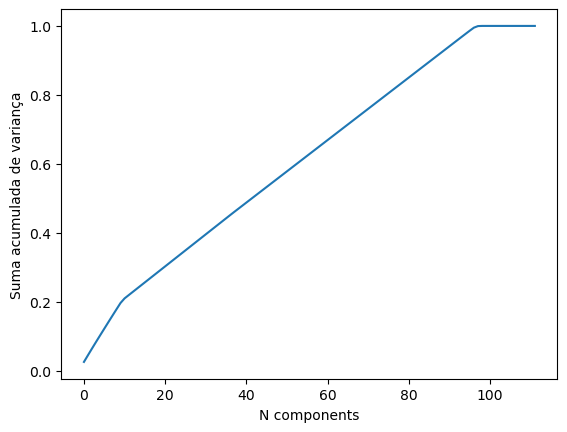

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('N components')
plt.ylabel('Suma acumulada de variança')
plt.show()

In [31]:
print(np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.9))

(array([ 86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111],
      dtype=int64),)


Basant-nos en la gràfica, el número òptim de dimensions per tal de mantenir una variança acumulada del 90% es de 86. 